

# 911 Calls Data Analysis Capstone Project

© Darey.io

For this data analysis project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Analytics skills!

### Section 1: Data and Setup

____
**Import numpy and pandas**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


**Import visualization libraries and set %matplotlib inline.**

**Read in the csv file as a dataframe called df**

In [3]:
df = pd.read_csv(r'911.csv')


**Check the info() of the df**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663282 entries, 0 to 663281
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663282 non-null  float64
 1   lng        663282 non-null  float64
 2   desc       663282 non-null  object 
 3   zip        583117 non-null  float64
 4   title      663282 non-null  object 
 5   timeStamp  663282 non-null  object 
 6   twp        662989 non-null  object 
 7   addr       663282 non-null  object 
 8   e          663282 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.5+ MB


**Check the head of df**

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Section 2: Basic Questions

**What are the top 5 zipcodes for 911 calls?**

In [5]:
df['zip'].value_counts().head(5)

zip
19401.0    45583
19464.0    43900
19403.0    34874
19446.0    32257
19406.0    22458
Name: count, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [6]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    55470
ABINGTON        39927
NORRISTOWN      37616
UPPER MERION    35990
CHELTENHAM      30554
Name: count, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [7]:
df.head(2)
df['title'].nunique()

148

### Section 3: Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

**For example, if the title column value is EMS: BACK PAINS/INJURY, the Reason column value would be EMS.**

In [6]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,12/10/2015 17:10,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,12/10/2015 17:29,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,12/10/2015 14:39,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,12/10/2015 16:47,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,12/10/2015 16:56,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**What is the most common Reason for a 911 call based off of this new column?**

In [7]:
df['Reason'].value_counts()

Reason
EMS        332591
Traffic    230115
Fire       100576
Name: count, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

C:\Users\BUYPC COMPUTERS\AppData\Local\Temp\ipykernel_3832\1006603423.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Reason', data = df, palette = ['blue', 'red', 'purple'])


<Axes: xlabel='Reason', ylabel='count'>

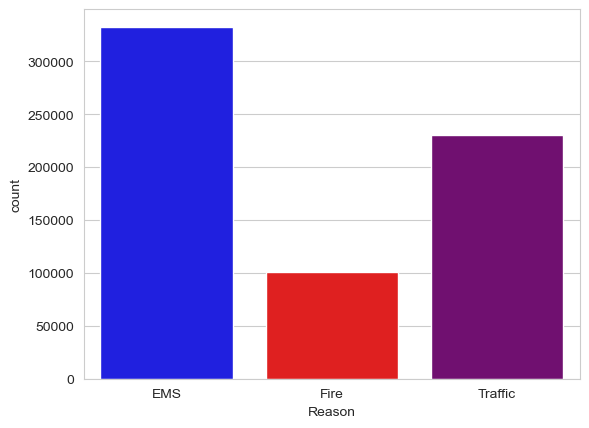

In [41]:
sns.countplot(x = 'Reason', data = df, palette = ['blue', 'red', 'purple'])

___
**Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?**

In [18]:
type( df['timeStamp'].iloc[0])

str

**You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects.**

In [9]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.timeStamp.head(2)

0   2015-12-10 17:10:00
1   2015-12-10 17:29:00
Name: timeStamp, dtype: datetime64[ns]

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column.**

In [18]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [10]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [35]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


**Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.**

<Axes: xlabel='timeStamp', ylabel='count'>

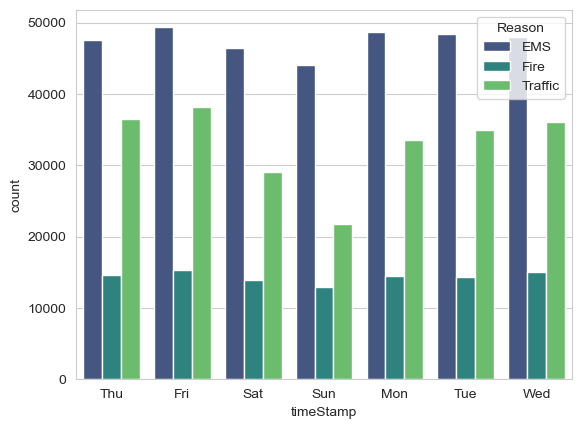

In [37]:
sns.countplot(x=df['timeStamp'].dt.dayofweek.map(dmap), data=df, hue='Reason', palette='viridis')

**Now do the same for Month:**

<Axes: xlabel='timeStamp', ylabel='count'>

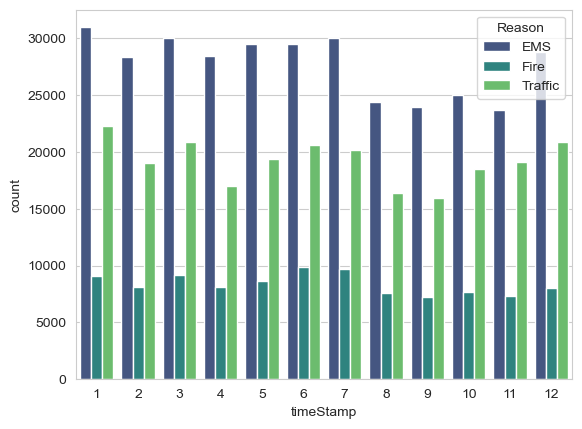

In [42]:
sns.countplot(x=df['timeStamp'].dt.month, data=df, hue='Reason', palette='viridis')

**Did you notice something strange about the Plot?**

_____

**You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas...**

**Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [47]:
byMonth = df.groupby(df['timeStamp'].dt.month).count().head()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
timeStamp,,,,,,,,,,,,,
1,62312,62312,62312,55278,62312,62312,62288,62312,62312,62312,62312,62312,62312
2,55423,55423,55423,48918,55423,55423,55401,55423,55423,55423,55423,55423,55423
3,60015,60015,60015,53242,60015,60015,59989,60015,60015,60015,60015,60015,60015
4,53560,53560,53560,47251,53560,53560,53544,53560,53560,53560,53560,53560,53560
5,57488,57488,57488,50333,57488,57488,57453,57488,57488,57488,57488,57488,57488


**Now create a simple plot off of the dataframe indicating the count of calls per month.**

<Axes: xlabel='timeStamp'>

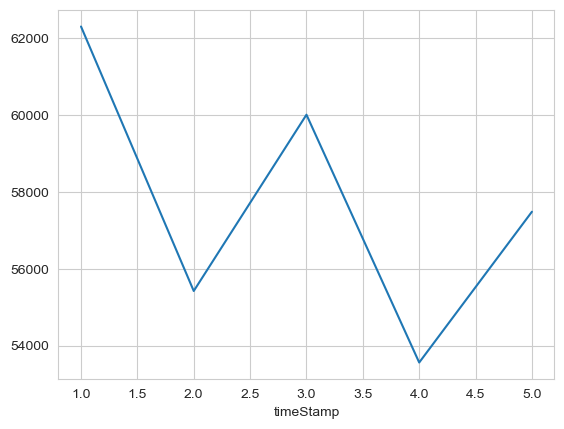

In [50]:
byMonth['lat'].plot()

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.**

In [52]:


df['Date'] = df['timeStamp'].apply(lambda t: t.date())

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:00,NORRISTOWN,HAWS AVE,1,Fire,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [54]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,397,397,397,331,397,397,397,397,397,397,397,397,397
2015-12-13,310,310,310,274,310,310,310,310,310,310,310,310,310
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


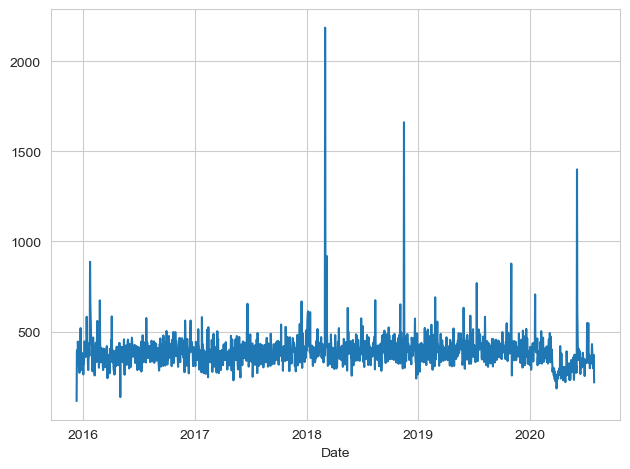

In [55]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [56]:
values_in_Reason = df.Reason.value_counts()
print(values_in_Reason )
df[df['Reason']== 'EMS'].groupby('Date').count().head()

Reason
EMS        332591
Traffic    230115
Fire       100576
Name: count, dtype: int64


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,58,58,58,53,58,58,58,58,58,58,58,58,58
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,186,186,186,168,186,186,186,186,186,186,186,186,186
2015-12-13,188,188,188,176,188,188,188,188,188,188,188,188,188
2015-12-14,221,221,221,200,221,221,221,221,221,221,221,221,221


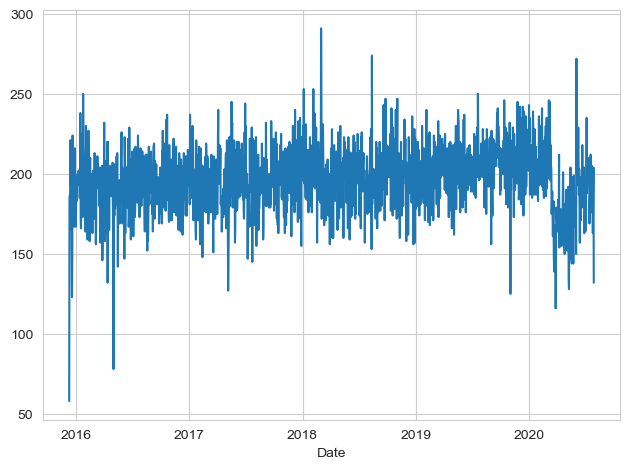

In [57]:
df[df['Reason']== 'EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [58]:
df[df['Reason']== 'Traffic'].groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,41,41,41,34,41,41,41,41,41,41,41,41,41
2015-12-11,137,137,137,107,137,137,137,137,137,137,137,137,137
2015-12-12,144,144,144,109,144,144,144,144,144,144,144,144,144
2015-12-13,72,72,72,51,72,72,72,72,72,72,72,72,72
2015-12-14,184,184,184,150,184,184,184,184,184,184,184,184,184


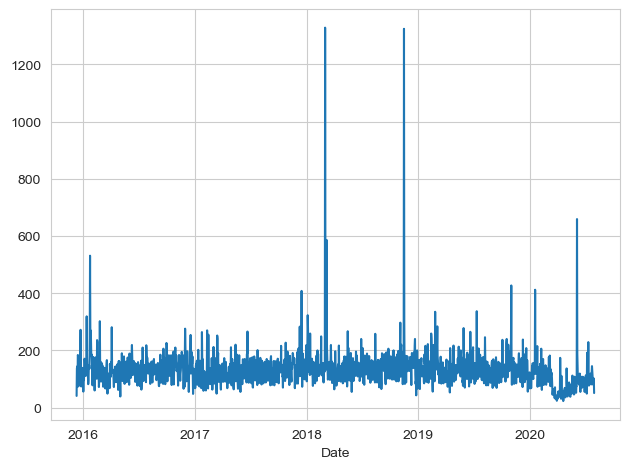

In [59]:
df[df['Reason']== 'Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [60]:
df[df['Reason']== 'Fire'].groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,68,68,68,59,68,68,68,68,68,68,68,68,68
2015-12-12,67,67,67,54,67,67,67,67,67,67,67,67,67
2015-12-13,50,50,50,47,50,50,50,50,50,50,50,50,50
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39


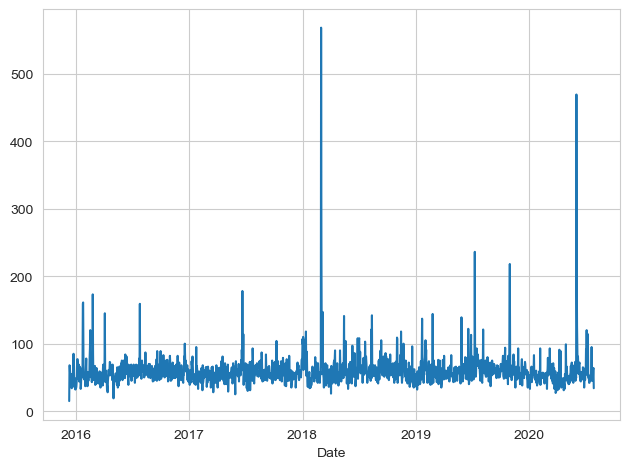

In [61]:
df[df['Reason']== 'Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.**

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354


In [65]:
dayHour = df.groupby(by=[df['timeStamp'].dt.dayofweek,df['timeStamp'].dt.hour]).count()['Reason'].unstack()
dayHour.head()

timeStamp,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
timeStamp,,,,,,,,,,,,,,,,,,,,,
0,1894,1571,1368,1272,1336,1844,2675,4430,5500,5724,...,5710,6287,6342,6408,5439,4487,3823,3253,2657,2071
1,1719,1459,1322,1213,1247,1740,2783,4420,5632,5563,...,5920,6247,6494,6881,5628,4621,3842,3409,2707,2137
2,1664,1483,1259,1265,1128,1609,2668,4642,5468,5444,...,6068,6530,6744,7049,5689,4686,4115,3535,2826,2206
3,1731,1406,1426,1235,1293,1775,2815,4432,5294,5410,...,6076,6490,6375,6932,5510,4703,4040,3487,2839,2354
4,1982,1634,1449,1295,1339,1638,2670,4143,5016,5288,...,6394,7040,7064,7108,5663,5055,4373,3913,3422,2834


**Now create a HeatMap using this new DataFrame.**

<Axes: xlabel='timeStamp', ylabel='timeStamp'>

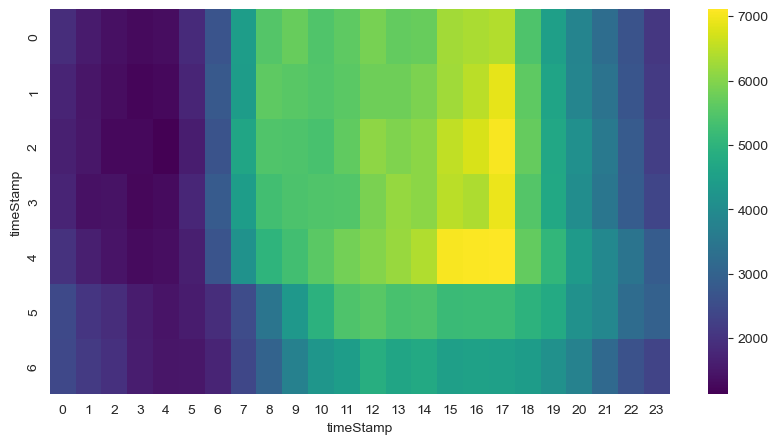

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(dayHour, cmap='viridis')

**Now create a clustermap using this DataFrame.**

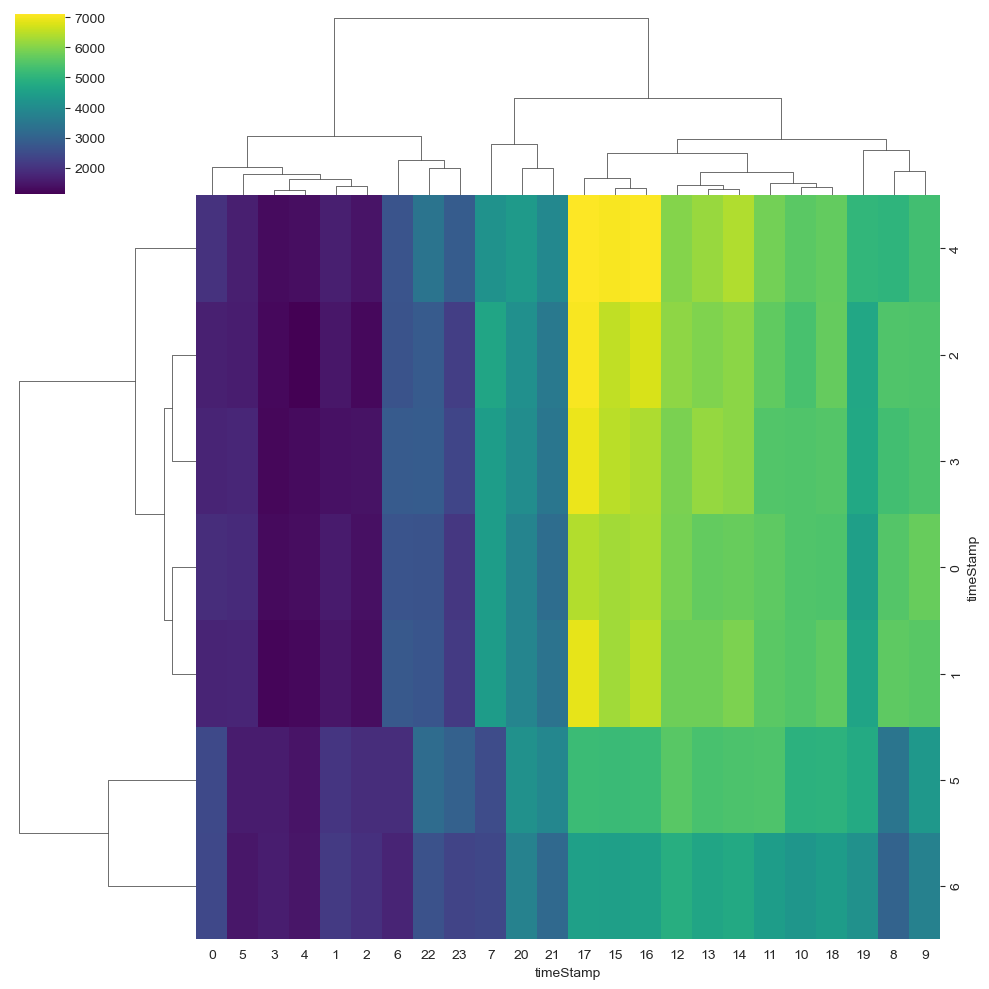

In [78]:
sns.clustermap(dayHour, cmap='viridis')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [68]:
daymonth = df.groupby(by=[df['timeStamp'].dt.dayofweek,df['timeStamp'].dt.month]).count()['Reason'].unstack()
daymonth.head()

timeStamp,1,2,3,4,5,6,7,8,9,10,11,12
timeStamp,,,,,,,,,,,,
0,8896,8747,8060,8401,7878,8509,9496,6853,6598,8074,6719,8491
1,9708,8087,8372,7545,9021,8346,9086,7290,6599,7948,7344,8305
2,9409,8293,8988,7600,9041,9440,8579,7984,6829,7876,7408,7679
3,9040,7997,8849,7701,8736,9489,8376,7506,6952,7482,8358,8151
4,9309,8255,10940,7968,8898,9203,8681,7336,7694,6934,8379,9305


<Axes: xlabel='timeStamp', ylabel='timeStamp'>

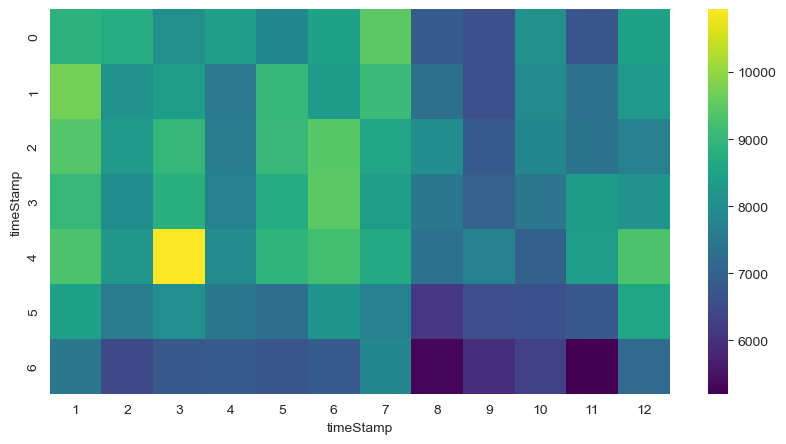

In [72]:
plt.figure(figsize=(10,5))
sns.heatmap(daymonth, cmap='viridis')

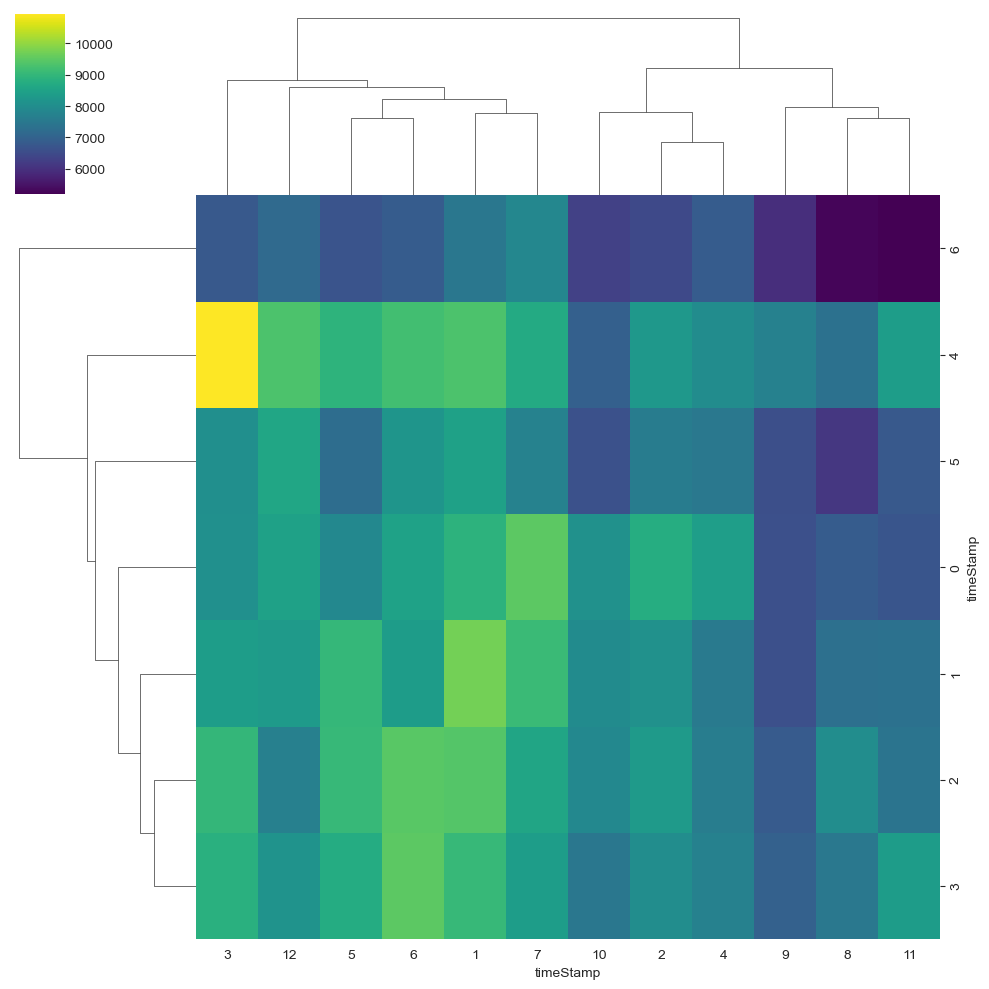

In [79]:
sns.clustermap(daymonth, cmap = 'viridis')

**Continue exploring the Data however you see fit!**
# Great Job!